## NREL WIND Toolkit - HSDS Demo

This notebook demonstrates basic usage of the National Renewable Energy Laboratory (NREL) Wind Integration National Dataset (WIND) Toolkit data. The data is provided from Amazon Web Services using the HDF Group's Highly Scalable Data Service (HSDS).

For this to work you must first install h5pyd:

```
pip install h5pyd
```

Then, you can make a configuration file at ~/.hscfg with contents like so:

```
# HDFCloud configuration file
hs_endpoint = https://developer.nrel.gov/api/hsds/
hs_username = None
hs_password = None
hs_api_key = 3K3JQbjZmWctY0xmIfSYvYgtIcM3CN0cb1Y2w9bf
```

*The example API key here is for demonstation and is rate-limited per IP. To get your own API key, visit https://developer.nrel.gov/signup/*

In [ ]:
%matplotlib inline
import h5pyd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
# Open the wind data "file"
# server endpoint, username, password is found via a config file
f = h5pyd.File("/nrel/wtk-us.h5", 'r')  

In [3]:
f.attrs['history']   # attributes can be used to provide desriptions of the content

'Produced by 3TIER, Inc. under NREL subcontract AGV-2-22460-01'

In [4]:
list(f)  # list the datasets in the file

['DIF',
 'DNI',
 'GHI',
 'coordinates',
 'datetime',
 'inversemoninobukhovlength_2m',
 'precipitationrate_0m',
 'pressure_0m',
 'pressure_100m',
 'pressure_200m',
 'relativehumidity_2m',
 'status',
 'temperature_100m',
 'temperature_10m',
 'temperature_120m',
 'temperature_140m',
 'temperature_160m',
 'temperature_200m',
 'temperature_2m',
 'temperature_40m',
 'temperature_60m',
 'temperature_80m',
 'winddirection_100m',
 'winddirection_10m',
 'winddirection_120m',
 'winddirection_140m',
 'winddirection_160m',
 'winddirection_200m',
 'winddirection_40m',
 'winddirection_60m',
 'winddirection_80m',
 'windspeed_100m',
 'windspeed_10m',
 'windspeed_120m',
 'windspeed_140m',
 'windspeed_160m',
 'windspeed_200m',
 'windspeed_40m',
 'windspeed_60m',
 'windspeed_80m']

In [5]:
dset = f['windspeed_60m']

In [6]:
dset.id.id  # if this is an int, then you are using h5py!

'd-d29b712c-85f3-11e7-bf89-0242ac110008'

In [7]:
dset.shape

(61368, 1602, 2976)

In [8]:
dset.dtype

dtype('float32')

In [9]:
dset.chunks

[24, 89, 186]

In [10]:
dset.shape[0] * dset.shape[1] * dset.shape[2] * 4  # 1 TB!

1170300524544

In [11]:
(dset.shape[0] * dset.shape[1] * dset.shape[2]) // (dset.chunks[0] * dset.chunks[1] * dset.chunks[2])  # lots a chunks

736416

In [12]:
dset.shape[1] * dset.shape[2] * 4  # 18 MB per slice

19070208

In [16]:
%time data = dset[1795,::8,::8]

CPU times: user 8.66 ms, sys: 3.9 ms, total: 12.6 ms
Wall time: 909 ms


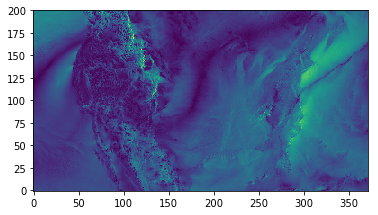

In [17]:
plt.imshow(data, origin="lower")

In [15]:
%time data = dset[2199,1100:1400,2000:2400]  # full-rez subset

CPU times: user 10.2 ms, sys: 5.03 ms, total: 15.2 ms
Wall time: 250 ms


In [ ]:
plt.imshow(data, origin="lower")

In [ ]:
%time tseries = dset[:, 891, 600]

In [ ]:
len(tseries)   # 365 days * 24 hours

In [ ]:
x = range(dset.shape[0])
plt.plot(x, tseries)

In [ ]:
tseries.mean()